In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import skimage as ski


import skimage.data
import skimage.color

# Meaning of things
The following parameters control the operation of the matching procedure. N1 dictates how big the blocks are. We generally work with square blocks, N1 by N1. N2 dictates how many similar blocks are considered for a group. In this experiment, it will only affect the number of similar blocks shown in the end. Finally, NS controls the size of the search area. While ideally one would search the whole image for relevant blocks, it would be too computationally expensive. So, in general, one defines a square search area around the reference block and searches within that area.

For simplicity of implementation, this notebook search area has the reference block in the top left corner. Furthermore, all blocks whose top left corner lies within the search area are considered for matching. Put simply, the reference block has coordinates (0,0) and NS by NS blocks are considered.

You can change these numbers to experiment.

In [2]:
## Method parameters.
N1 = 8   # Block size
N2 = 64  # Number of similar blocks
NS = 32  # Search window side

In [3]:
# Read and show input image.
y = ski.data.rocket()

The coordinates are being introduced by hand because I don't know how to make this thing interactive. You can change variable 'x' to see how other reference blocks would affect the matching. As the comment says, x stands for the top left corner of the reference block, in (row,column) format. x of (0,0) would give a reference block at the top left corner of the image. The next cell will show you where the reference block is positioned on the image and also a zoomed version of it for your inspectoin.

Ideally I would like to make this interactive so you would be able to just click on the image and have it compute the matches for a reference block positioned on the place where you clicked, but I don't know enough python to do that at the moment.

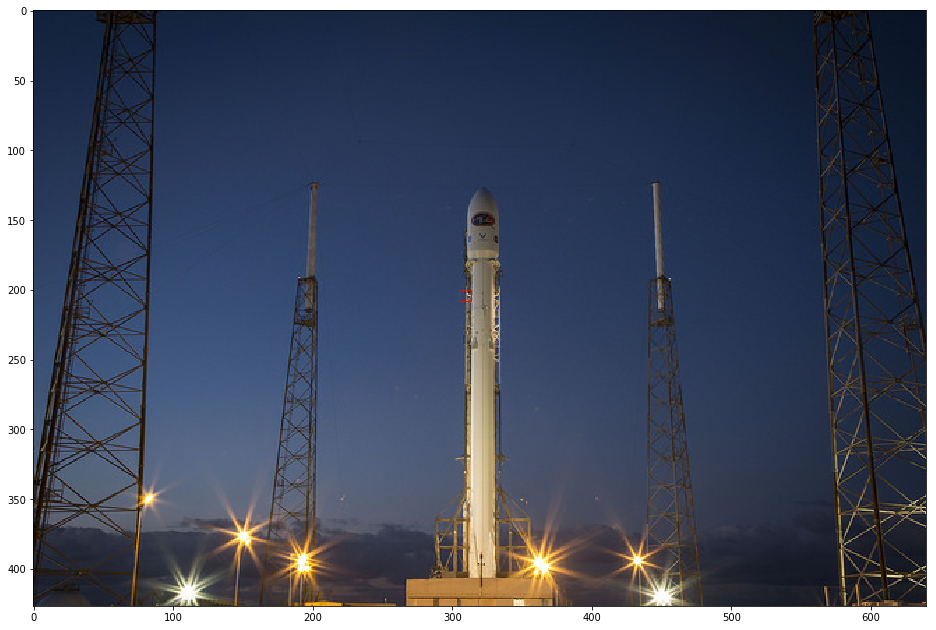

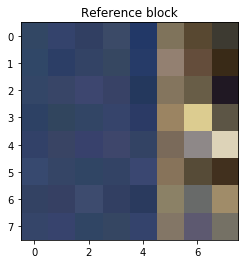

In [4]:
## Select the reference block.

#x = plt.ginput(1)
#print(x)

# (row, column) origin is at top left
x = (200, 305);

# Why can't we all agreed on a single coordinate system? Ploting is (x,y)
ys = y.shape
xplt = (x[1], x[0])

# Extract reference block
ref = y[x[0]:x[0]+N1, x[1]:x[1]+N1,:]

plt.figure(figsize=(16,16))
ax = plt.subplot(1,1,1)
ax.imshow(y)
ax.add_patch(patches.Rectangle(xplt, N1, N1, fill=False, edgecolor='red'))

plt.figure()
plt.imshow(ref)
plt.title('Reference block')

plt.show()

The Euclidean distance is generally used as the distance metric between blocks. Because of historical reasons, only the luminance component is generally used to compute the distance. In practice, anything can be used, so this is more like a convention than anything else.

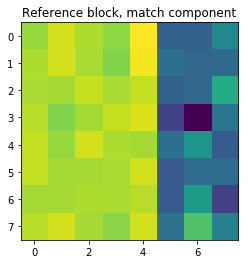

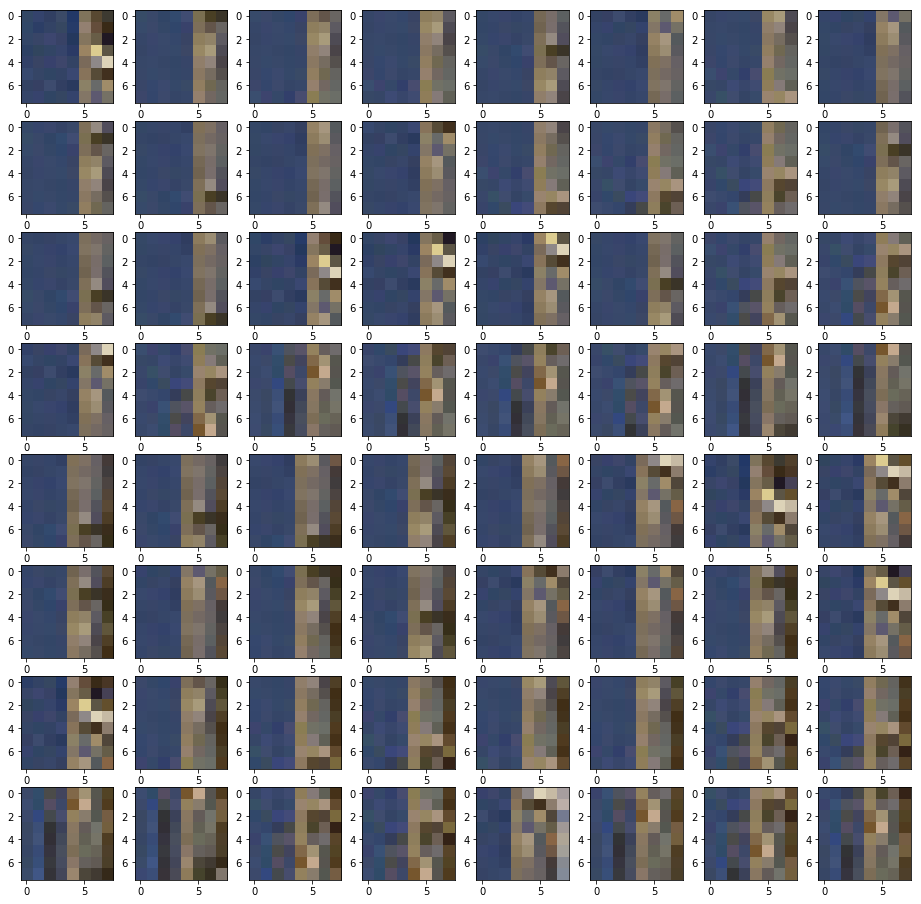

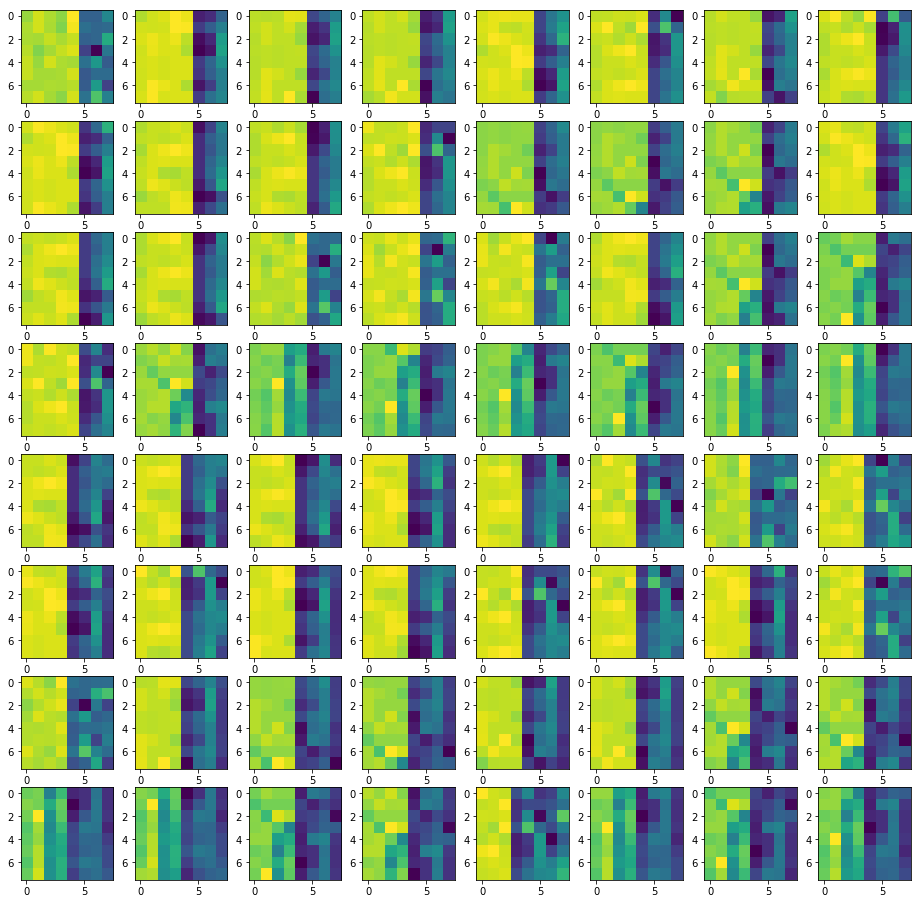

In [14]:
## Compute the distance and show best blocks.

# Distances are computed in luminance domain
ref_l = ski.color.rgb2ycbcr(ref)[:,:,1]
y_l = ski.color.rgb2ycbcr(y)[:,:,1]
#ref_l = ski.color.rgb2hsv(ref)[:,:,0]
#y_l = ski.color.rgb2hsv(y)[:,:,0]

plt.figure()
plt.imshow(ref_l)
plt.title('Reference block, match component')
plt.show()

blk = []
blk_l = []
d = np.zeros((NS,NS))
for xx0 in range(NS):
    for xx1 in range(NS):
        blk.append(y[x[0]+xx0:x[0]+xx0+N1, x[1]+xx1:x[1]+xx1+N1, :])
        blk_l.append(y_l[x[0]+xx0:x[0]+xx0+N1, x[1]+xx1:x[1]+xx1+N1])
        d[xx0,xx1] = np.sum((ref_l - blk_l[-1])**2)

sel = np.argsort(d, axis=None)

plt.figure(figsize=(16,16))
for r in range(N2):
    b = blk[sel[r]]
    plt.subplot(np.sqrt(N2), np.sqrt(N2), r+1)
    plt.imshow(b)
plt.show()

plt.figure(figsize=(16,16))
for r in range(N2):
    b = blk_l[sel[r]]
    plt.subplot(np.sqrt(N2), np.sqrt(N2), r+1)
    plt.imshow(b)
plt.show()